In [1]:
import torch
import torchvision
import numpy as np
import d2lzh_pytorch as d2l
# softmax回归从零开始

In [2]:
# 获取和读取数据
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
len(train_iter)

235

In [4]:
len(test_iter)

40

In [5]:
# 初始化模型参数
num_inputs = 784   # 28 * 28
num_outputs = 10
W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [6]:
W

tensor([[ 0.0153, -0.0084, -0.0040,  ...,  0.0004, -0.0024, -0.0087],
        [ 0.0036,  0.0098,  0.0072,  ..., -0.0176, -0.0128,  0.0054],
        [-0.0015,  0.0114, -0.0006,  ...,  0.0133,  0.0028, -0.0250],
        ...,
        [-0.0026, -0.0026, -0.0090,  ..., -0.0046, -0.0040, -0.0096],
        [-0.0172,  0.0053, -0.0135,  ..., -0.0055,  0.0027,  0.0064],
        [-0.0064,  0.0035, -0.0004,  ...,  0.0084,  0.0023,  0.0014]],
       requires_grad=True)

In [7]:
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [8]:
# softmax运算
def softmax(X): 
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

In [9]:
# 定义模型
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

In [10]:
# 定义损失函数
def cross_entropy(y_hat, y):
    return -torch.log(y_hat.gather(1, y.view(-1, 1)))

In [11]:
# 计算分类准确率
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [12]:
# 训练模型
num_epochs, lr = 5, 0.1
d2l.train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7843, train acc 0.750, test acc 0.794
epoch 2, loss 0.5704, train acc 0.813, test acc 0.814
epoch 3, loss 0.5245, train acc 0.826, test acc 0.819
epoch 4, loss 0.5009, train acc 0.832, test acc 0.825
epoch 5, loss 0.4847, train acc 0.838, test acc 0.828


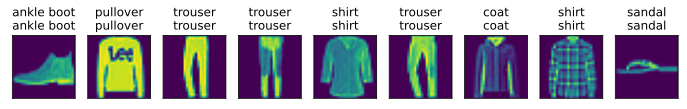

In [13]:
# 预测
X, y = iter(test_iter).next()
true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]
d2l.show_fashion_mnist(X[0:9], titles[0:9])